# DETERMINE STRUCTURE

LOAD DATASET

In [1]:
import scipy.io as scio
base = scio.loadmat('ndata.mat')
x,y = base['orgin'].transpose(),base['result'][:,1]

In [2]:
xmin,xmax = x.min(),x.max()
x=(x-xmin)/(xmax-xmin)
ymin,ymax = y.min(axis=0),y.max(axis=0)
y =  (y-ymin)/(ymax-ymin)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=0)

## BUILD MODEL

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
import numpy as np

Using TensorFlow backend.


In [24]:
model = Sequential()
model.add(Dense(256,input_shape=(1867,),name='layer1'))
model.add(Activation('tanh'))
#model.add(Dropout(0.5))

# model.add(Dense(128,name='layer2'))
# model.add(Activation('relu'))
# #model.add(Dropout(0.5))

# model.add(Dense(128,name='layer3'))
# model.add(Activation('relu'))
# #model.add(Dropout(0.5))

# model.add(Dense(128,name='layer4'))
# model.add(Activation('relu'))
# #model.add(Dropout(0.5))

model.add(Dense(1,name='output'))
#model.add(Activation('tanh'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 256)               478208    
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 257       
Total params: 478,465
Trainable params: 478,465
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import Adam
adam = Adam(lr=0.001, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_squared_error',optimizer=adam)

In [26]:
history = model.fit(x_train,y_train,epochs=1000,batch_size=10,shuffle=True,validation_split=0.2,\
                    verbose=1)

C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


Train on 24 samples, validate on 6 samples
Epoch 1/1000
24/24 [==============================] - 0s - loss: 2.8255 - val_loss: 2.0473
Epoch 2/1000
24/24 [==============================] - 0s - loss: 2.5941 - val_loss: 0.3188
Epoch 3/1000
24/24 [==============================] - 0s - loss: 1.3208 - val_loss: 0.7749
Epoch 4/1000
24/24 [==============================] - 0s - loss: 0.5024 - val_loss: 1.1539
Epoch 5/1000
24/24 [==============================] - 0s - loss: 0.9939 - val_loss: 0.1214
Epoch 6/1000
24/24 [==============================] - 0s - loss: 0.3577 - val_loss: 0.4384
Epoch 7/1000
24/24 [==============================] - 0s - loss: 0.2030 - val_loss: 0.2680
Epoch 8/1000
24/24 [==============================] - 0s - loss: 0.3511 - val_loss: 0.0310
Epoch 9/1000
24/24 [==============================] - 0s - loss: 0.0780 - val_loss: 0.2820
Epoch 10/1000
24/24 [==============================] - 0s - loss: 0.1902 - val_loss: 0.0184
Epoch 11/1000
24/24 [=========================

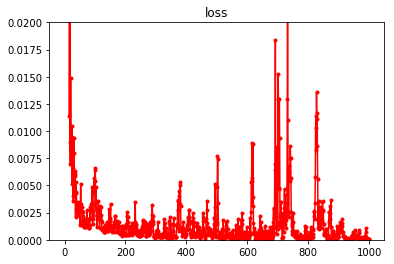

In [29]:
import matplotlib.pyplot as plt
#print(history.history)  
loss = history.history['loss']
fig,ax = plt.subplots()
ax.plot(loss,'r.-')
ax.set(ylim=[0,0.02])
plt.title('loss')
plt.show()

In [28]:
loss_conv = np.load('loss_conv.npy')

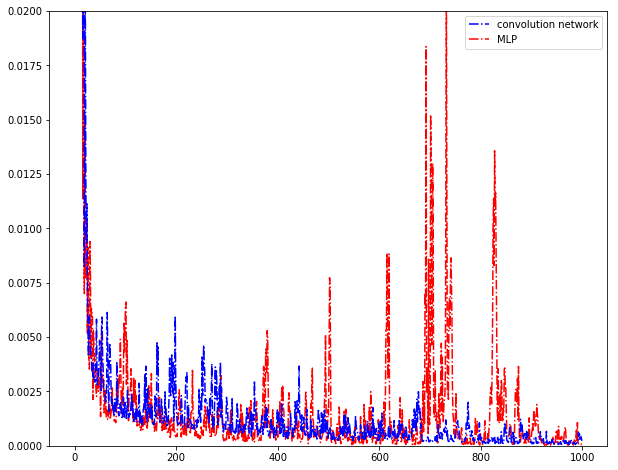

In [34]:
plt.figure(figsize=(10,8))
plt.plot(loss_conv,'b-.',ms=3,label='convolution network',zorder=2)
plt.plot(loss,'r-.',ms=3,label='MLP',zorder = 1)
plt.ylim([0,0.02])
plt.legend()
plt.savefig('compare_mlp_cnn.png')
plt.show()

In [22]:
from sklearn.metrics import r2_score
y_train_true,y_train_pred = y_train,model.predict(x_train)
y_test_true, y_test_pred  = y_test, model.predict(x_test)
print( r2_score(y_test_true, y_test_pred),
      r2_score(y_train_true,y_train_pred))

0.986907783382 0.986843021549


C:\Program Files\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2252: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


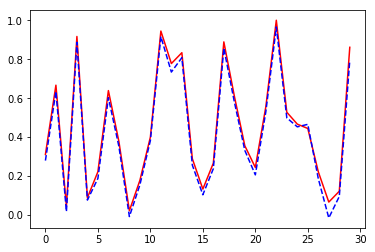

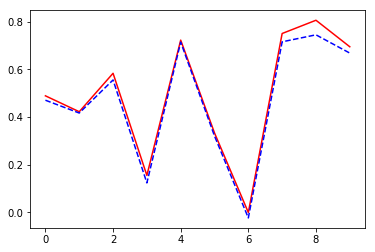

In [23]:
import numpy as np
import matplotlib.pyplot as plt
train_numb,test_numb = len(y_train_true),len(y_test_pred)
plt.plot(np.arange(train_numb),y_train_true,'r-',
        np.arange(train_numb), y_train_pred,'b--')
plt.show()
plt.plot(np.arange(test_numb),y_test_true,'r-',
        np.arange(test_numb), y_test_pred,'b--')
plt.show()